NoteBook for the présentation of our code for the application track in REINFORCMENT LEARNING A2024

In [29]:
#Libraries used

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Import of the class for the tabular Monte-Carlo method

from Trains_tabular import Environnment

#Import of the classe for the DQN method

from Trains_gym import TrainEnv


Presentation of the tabular case 

In [31]:
env_small = Environnment('instances\Asmall.json')
env_small.print_env()



   id  sensDepart voieEnLigne voieAQuai typeCirculation            dateHeure  \
0   1           1        V2_N        V2            FRET     2021-03-30T20:35   
1   9           1       VU2_S        11             TER     2021-03-30T21:36   
2   4           1        V1_S        V1            TECH     2021-03-30T20:43   
3   5           0        V1_N        V1             TGV  2021-03-30T21:00:30   
4   8           1        V2_N        V2            FRET     2021-03-30T21:14   

  typesMateriels  
0            [1]  
1            [0]  
2            [0]  
3            [0]  
4            [1]  
0     1
1     9
2     4
3     5
4     8
5    11
6    12
7    15
8    17
Name: id, dtype: int64
the state space (les id des trains) None


0
1
2
3
4
5
6
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
7
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
8
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
9
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
10
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
11
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
12
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
13
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
14
assignation optimale
{1: 31, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 235, 17: 11}
15
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
16
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


27
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
28
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
29
assignation optimale
{1: 169, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
30
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
31
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 315, 15: 11, 17: 11}
32
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
33
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
34
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 337}
35
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
36
assignation optimale
{1: 11, 9: 5, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
37
assignation optimale
{1: 11, 9: 365, 4: 53, 5: 65, 8: 60, 11: 11, 12: 3, 15: 11, 17: 11}
38
a

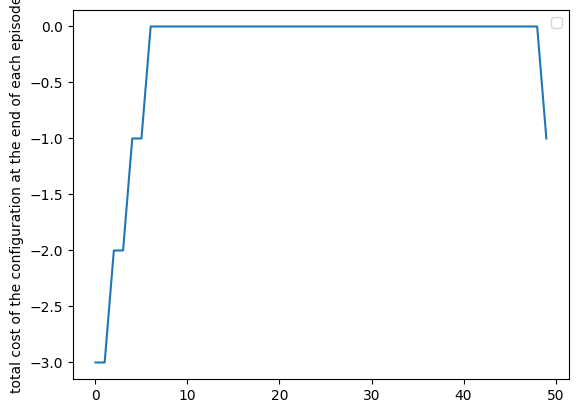

In [32]:
results_small = env_small.train_model(50)
plt.plot(results_small)
plt.ylabel(" cost  at the end of each episode")
plt.legend()
plt.show()

For the second instance of data : inst_A.json

In [33]:
env_A = Environnment('instances\inst_A.json')
env_A.print_env()

   id  sensDepart voieEnLigne voieAQuai typeCirculation            dateHeure  \
0   0           0        V1_N        V1            FRET     2021-04-11T05:08   
1   3           1        V2_N         3             TER     2021-04-11T06:11   
2   4           0       VU1_S         Z             TER  2021-04-11T06:14:30   
3   7           1        V1_S         Z             TER     2021-04-11T06:44   
4   9           1        V2_N        V2            FRET     2021-04-11T07:01   

  typesMateriels  
0            [1]  
1            [0]  
2            [0]  
3            [0]  
4            [1]  
0      0
1      3
2      4
3      7
4      9
5     10
6     12
7     14
8     20
9     24
10    18
11    19
12    23
13    25
14    28
15    29
16    36
17    43
18    33
19    37
20    41
21    39
22    42
23    46
24    48
25    50
26    54
27    56
28    60
29    61
30    62
31    69
32    68
33    70
34    72
35    73
36    74
37    77
38    80
39    81
40    84
41    86
42    88
43    91
44    92


0
1
2
3
4
5
6
7
8
9
10
11
assignation optimale
{0: 14, 3: 11, 4: 27, 7: 2, 9: 11, 10: 14, 12: 60, 14: 60, 20: 428, 24: 60, 18: 72, 19: 95, 23: 67, 25: 14, 28: 2, 29: 14, 36: 5, 43: 60, 33: 79, 37: 70, 41: 312, 39: 104, 42: 95, 46: 44, 48: 48, 50: 96, 54: 44, 56: 88, 60: 3, 61: 65, 62: 72, 69: 11, 68: 53, 70: 3, 72: 3, 73: 202, 74: 58, 77: 24, 80: 95, 81: 14, 84: 2, 86: 116, 88: 3, 91: 11, 92: 3, 95: 11}
12
assignation optimale
{0: 14, 3: 11, 4: 27, 7: 2, 9: 11, 10: 14, 12: 60, 14: 60, 20: 0, 24: 60, 18: 72, 19: 95, 23: 314, 25: 14, 28: 2, 29: 14, 36: 5, 43: 60, 33: 79, 37: 70, 41: 312, 39: 104, 42: 95, 46: 44, 48: 48, 50: 53, 54: 44, 56: 88, 60: 3, 61: 65, 62: 72, 69: 11, 68: 53, 70: 3, 72: 3, 73: 65, 74: 58, 77: 24, 80: 95, 81: 14, 84: 2, 86: 11, 88: 3, 91: 11, 92: 3, 95: 11}
13
assignation optimale
{0: 14, 3: 11, 4: 27, 7: 2, 9: 11, 10: 14, 12: 60, 14: 60, 20: 0, 24: 60, 18: 72, 19: 95, 23: 67, 25: 14, 28: 2, 29: 14, 36: 5, 43: 60, 33: 79, 37: 70, 41: 312, 39: 104, 42: 95, 46: 44, 48

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


197
assignation optimale
{0: 14, 3: 74, 4: 27, 7: 2, 9: 11, 10: 14, 12: 64, 14: 64, 20: 0, 24: 60, 18: 72, 19: 95, 23: 67, 25: 16, 28: 23, 29: 14, 36: 26, 43: 271, 33: 93, 37: 70, 41: 312, 39: 156, 42: 95, 46: 65, 48: 194, 50: 96, 54: 65, 56: 92, 60: 3, 61: 79, 62: 134, 69: 11, 68: 53, 70: 3, 72: 3, 73: 65, 74: 58, 77: 24, 80: 95, 81: 44, 84: 53, 86: 29, 88: 3, 91: 11, 92: 3, 95: 11}
198
199
assignation optimale
{0: 14, 3: 11, 4: 27, 7: 2, 9: 11, 10: 14, 12: 64, 14: 64, 20: 0, 24: 60, 18: 72, 19: 95, 23: 67, 25: 16, 28: 23, 29: 14, 36: 26, 43: 60, 33: 93, 37: 70, 41: 312, 39: 156, 42: 95, 46: 65, 48: 194, 50: 96, 54: 180, 56: 92, 60: 3, 61: 79, 62: 134, 69: 11, 68: 53, 70: 3, 72: 3, 73: 65, 74: 58, 77: 24, 80: 95, 81: 44, 84: 53, 86: 29, 88: 3, 91: 11, 92: 3, 95: 271}


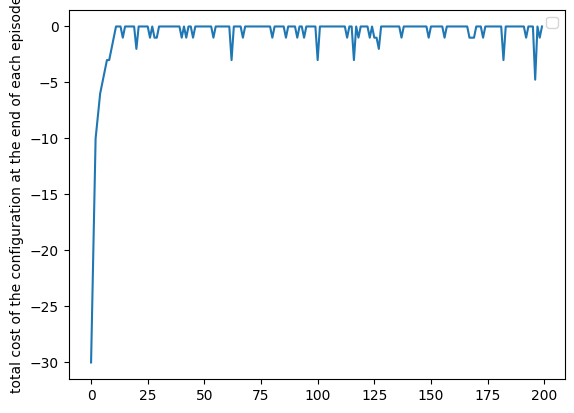

In [34]:
results_A = env_A.train_model(200)
plt.plot(results_A)
plt.ylabel("cost at the end of each episode")
plt.legend()
plt.show()

For the third instance of data , this time with constraints on the types of materials and types a electrical power : inst_NS.json

In [35]:
env_NS = Environnment('instances\inst_NS.json')
env_NS.print_env()

   id  sensDepart voieEnLigne voieAQuai typeCirculation         dateHeure  \
0   0           1          DS         2            TECH  2021-04-11T00:10   
1   7           1          VM        53            TECH  2021-04-11T04:30   
2   8           1          DL        55            TECH  2021-04-11T04:35   
3  15           1          DL        54            TECH  2021-04-11T05:05   
4  26           1          GL        52            TECH  2021-04-11T05:52   

  typesMateriels  
0            [2]  
1           [52]  
2           [40]  
3           [40]  
4            [5]  
0        0
1        7
2        8
3       15
4       26
      ... 
338    692
339    695
340    698
341    699
342    702
Name: id, Length: 343, dtype: int64
the state space (les id des trains) None


In [ ]:
results_NS = env_NS.train_model(200)
plt.plot(results_NS)
plt.ylabel(" cost at the end of each episode")
plt.legend()
plt.show()

For the fourth instance of data , this time with a lot more contraints on the materials and eletrical power : inst_PMP.json

In [ ]:
env_PMP = Environnment('instances\inst_PMP.json')
env_PMP.print_env()

Here we train using more episodes because of the fact that there is much more constraints in the data , meaning we need more exploration in order to achieve an optimal planification.

In [ ]:
results_PMP = env_PMP.train_model(500)

plt.plot(results_PMP)
plt.ylabel(" cost at the end of each episode")
plt.legend()
plt.show()

Fifth and last instance , much bigger in terms of memory space and data. We can see here the limitations of the tabular approach for this problem as the computation time is much longer. a complete run takes between 30 to 60 min depending on the machine you use.

In [ ]:
env_PE = Environnment('instances\inst_PE.json')
env_PE.print_env()

In [ ]:
results_PE = env_PE.train_model(100)
plt.plot(results_PE)
plt.ylabel("cost at the end of each episode")
plt.legend()
plt.show()